In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

C:\Users\jaide\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [42]:
df = pd.read_csv('energydata_complete.csv',index_col=0)

In [4]:
simple_linear_reg_df = df[['T2', 'T6']]

<AxesSubplot:xlabel='T2', ylabel='T6'>

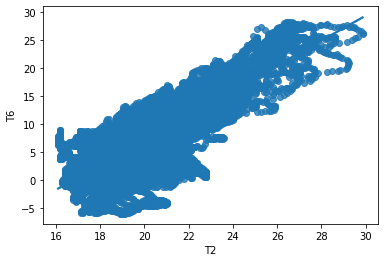

In [5]:
sns.regplot(x = "T2", y = "T6", data = simple_linear_reg_df)

In [6]:
import sklearn

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['T2']], df.T6, test_size=0.3, random_state=1)
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
predicted_values = linear_model.predict(x_test)

In [25]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2) 

0.65

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = df.drop('date',1)
df = df.drop('lights',1)
normalised_df = pd.DataFrame(scaler.fit_transform(df))
features_df = normalised_df.drop(columns = ['Appliances'])
target = normalised_df['Appliances']

C:\Users\jaide\AppData\Local\Temp/ipykernel_42220/86137167.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('date',1)


KeyError: "['date'] not found in axis"

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size=0.3, random_state=42)
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
predicted_values = linear_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

In [ ]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)